# 2020110498 통계학과 정호원

Titanic data에 대해 분석을 시작하기에 앞서 데이터에 대한 변수 설명을 하고자 한다.

- PassengerID : 고객 번호
- Pclass: 티켓의 등급 1 =1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
- Name : 승객의 이름
- Sex : 성별
- Age : 연령
- SibSp : 타이타닉호에 탑승한 형제/배우자의 수
- Parch : 타이타닉호에 탑승한 부모/자녀의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 객실 번호
- Embarked : 기항지 위치, C(Cherbourg), Q(Queenstown), S(Southampton)으로 3곳.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 정호원 : numpy를 np로 임포트하여 배열과 수학 연산 쉽게 처리
# 정호원 : matplotlib.pyplot을 plt로 임포트하여 데이터 시각화 도구 사용 가능하게 처리
import seaborn as sns
import seaborn.objects as so
import missingno as msno

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# 정호원 : sklearn에서 SVM(서포트 벡터 머신) 알고리즘, 모델 평가 도구(metrics), 데이터셋,
# 정호원 : 훈련 데이터와 테스트 데이터를 나누기 위한 train_test_split 함수 가져옴

import os
# 정호원 : 운영체제와 상호작용하기 위해 os 모듈 임포트
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# 정호원 : TensorFlow에서 불필요한 경고 메시지 숨기기 위해 로그 레벨 설정

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA  # 정호원 : PCA 차원 축소를 위해 sklearn에서 PCA 임포트.
from sklearn.cluster import KMeans, DBSCAN  # 정호원 : KMeans, DBSCAN 클러스터링 모델을 위한 sklearn 라이브러리 임포트.
from sklearn.preprocessing import StandardScaler, normalize  # 정호원 : 데이터 스케일링과 정규화를 위한 sklearn의 StandardScaler와 normalize 임포트.
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score  # 정호원 : 모델 평가 지표를 위한 sklearn 메트릭스 임포트.
from sklearn.mixture import GaussianMixture  # 정호원 : GMM 클러스터링을 위한 GaussianMixture 임포트.
from scipy.cluster.hierarchy import dendrogram, linkage  # 정호원 : 계층적 군집화와 덴드로그램 시각화를 위한 scipy 라이브러리 임포트.
from sklearn.manifold import TSNE  # 정호원 : t-SNE 차원 축소를 위한 sklearn의 TSNE 임포트.

import tensorflow as tf
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
# 정호원 : 추가적으로 필요한 것들을 정의

from google.colab import drive  # 정호원 : google.colab 모듈에서 drive 기능을 가져옴. Colab을 통해 Google 드라이브 파일에 접근하기 위해 사용
drive.mount('/content/drive')  # 정호원 : '/content/drive' 경로에 Google 드라이브를 마운트하여 드라이브 내 파일을 Colab에서 사용할 수 있게 설정하였음

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 나눔고딕 폰트 설치 및 설정
!apt-get install -y fonts-nanum
font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_DataScience/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# # 데이터 불러오기
# from google.colab import files  # 정호원 : google.colab 모듈에서 files 기능을 가져옴. Colab을 통해 로컬 파일을 업로드할 때 사용.
# file_uploaded = files.upload()  # 정호원 : 사용자가 로컬 파일을 업로드할 수 있는 인터페이스를 제공함.

# data = pd.read_csv('sales data.csv')  # 정호원 : 'sales data.csv' 파일을 읽어와서 데이터프레임(data)으로 저장.
# data.head()  # 정호원 : 데이터의 첫 5개 행을 확인하여 데이터가 올바르게 로드되었는지 확인함.

In [ ]:
# 데이터 로드 및 필요한 Feature 추출
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_DataScience/train.csv', index_col='PassengerId')
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]  # 정호원 : 모델에 필요한 Feature들만 추출

# 성별 데이터를 숫자로 변환 ('male' -> 0, 'female' -> 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # 정호원 : 문자열 데이터를 수치형 데이터로 변환하여 모델이 처리할 수 있도록 함.

# 결측값 제거 (나이와 요금 등의 결측값을 가진 데이터를 삭제)
df = df.dropna()  # 정호원 : 모델 학습에 방해가 되는 결측값을 제거.

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('Survived', axis=1)  # 'Survived' 열을 제외한 나머지를 독립 변수로 설정
y = df['Survived']  # 'Survived' 열을 종속 변수로 설정 (생존 여부)

# Feature Scaling (정규화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  # 정호원 : 나이, 요금 등 값의 범위가 다른 Feature를 정규화.

In [ ]:
# 데이터를 학습용(train)과 테스트용(test)으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1, test_size=0.2)
# 정호원 : 80%는 학습용으로, 20%는 테스트용으로 분리

In [ ]:
# Decision Tree 모델 설정 및 학습
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=4, random_state=1)  # 정호원 : 과적합을 방지하기 위해 max_depth를 4로 제한
model.fit(X_train, y_train)  # 모델 훈련


DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
# 테스트 데이터를 사용하여 예측
y_predict = model.predict(X_test)  # 정호원 : 학습된 모델로 테스트 데이터에 대한 생존 여부를 예측.

# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)  # 정호원 : 모델의 정확도를 계산.
print(f"Model Accuracy: {accuracy:.2f}")  # 정호원 : 정확도를 소수점 두 자리로 출력


Model Accuracy: 0.85


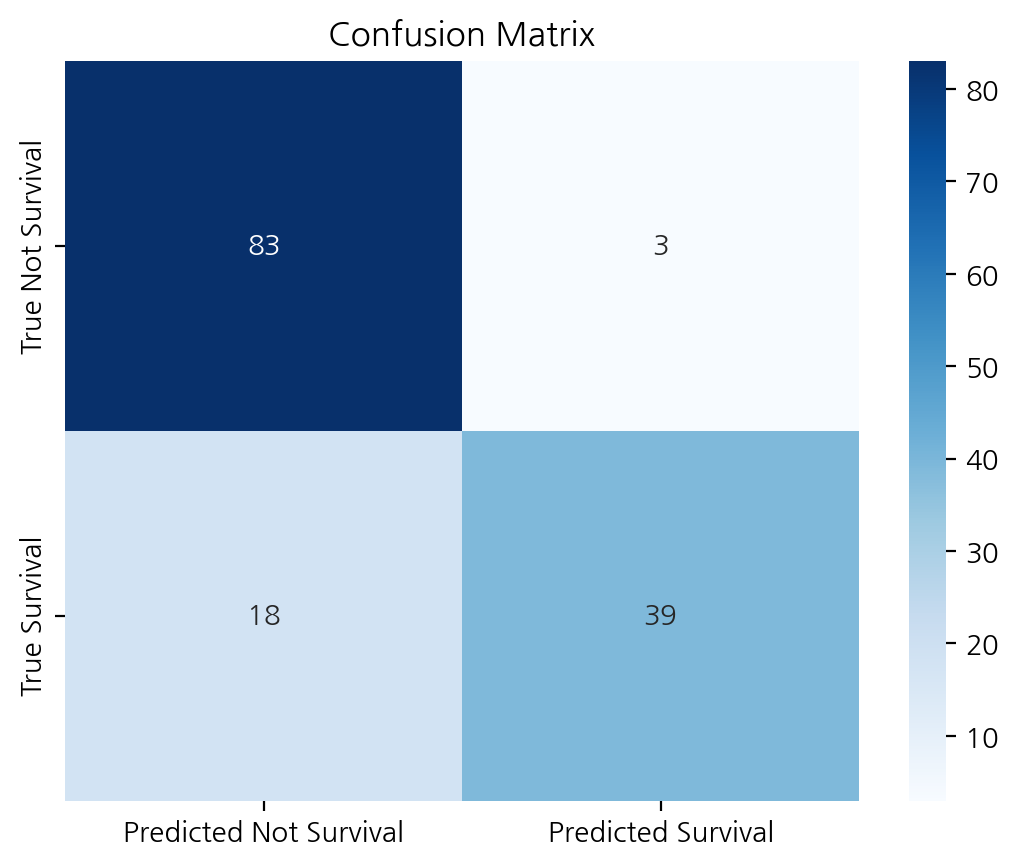

In [ ]:
# 혼동 행렬 계산 및 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Not Survival', 'Predicted Survival'], yticklabels=['True Not Survival', 'True Survival'])
plt.title("Confusion Matrix")
plt.show()  # 정호원 : 모델이 예측한 값과 실제 값의 비교 결과를 시각적으로 확인.


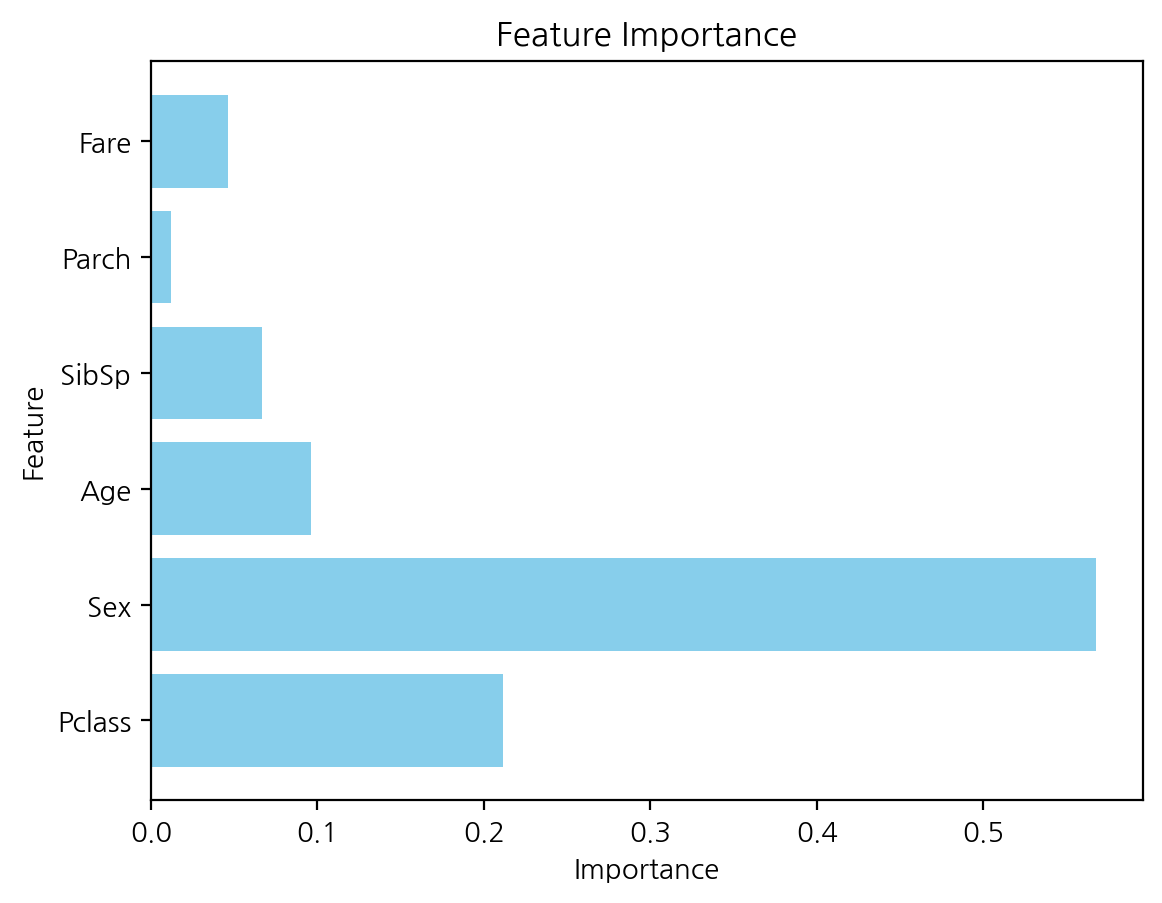

In [ ]:
# Feature Importance 계산 및 시각화
importance = model.feature_importances_  # 각 Feature의 중요도 계산
plt.barh(X.columns, importance, color='skyblue')  # 수평 바 그래프로 각 Feature의 중요도를 표시
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()  # 정호원 : 각 Feature가 생존 여부를 예측하는 데 얼마나 중요한지 시각적으로 확인.


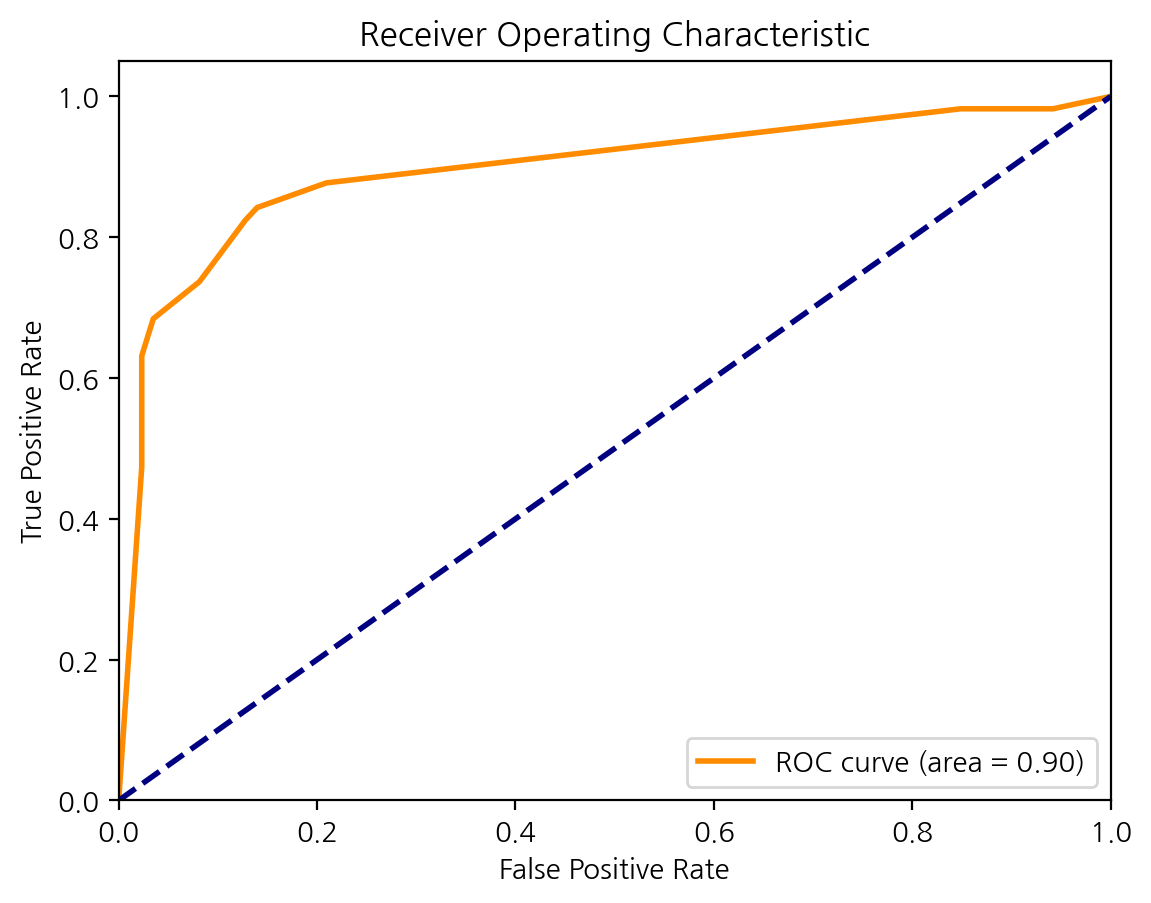

In [ ]:
# ROC Curve 및 AUC 계산
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]  # 각 샘플이 생존할 확률을 예측 (양성 클래스의 확률)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # 정호원 : False Positive Rate와 True Positive Rate 계산
roc_auc = auc(fpr, tpr)  # AUC 계산

# ROC Curve 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 무작위 예측에 해당하는 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  # 정호원 : ROC 곡선과 AUC를 통해 모델의 성능을 평가.

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}


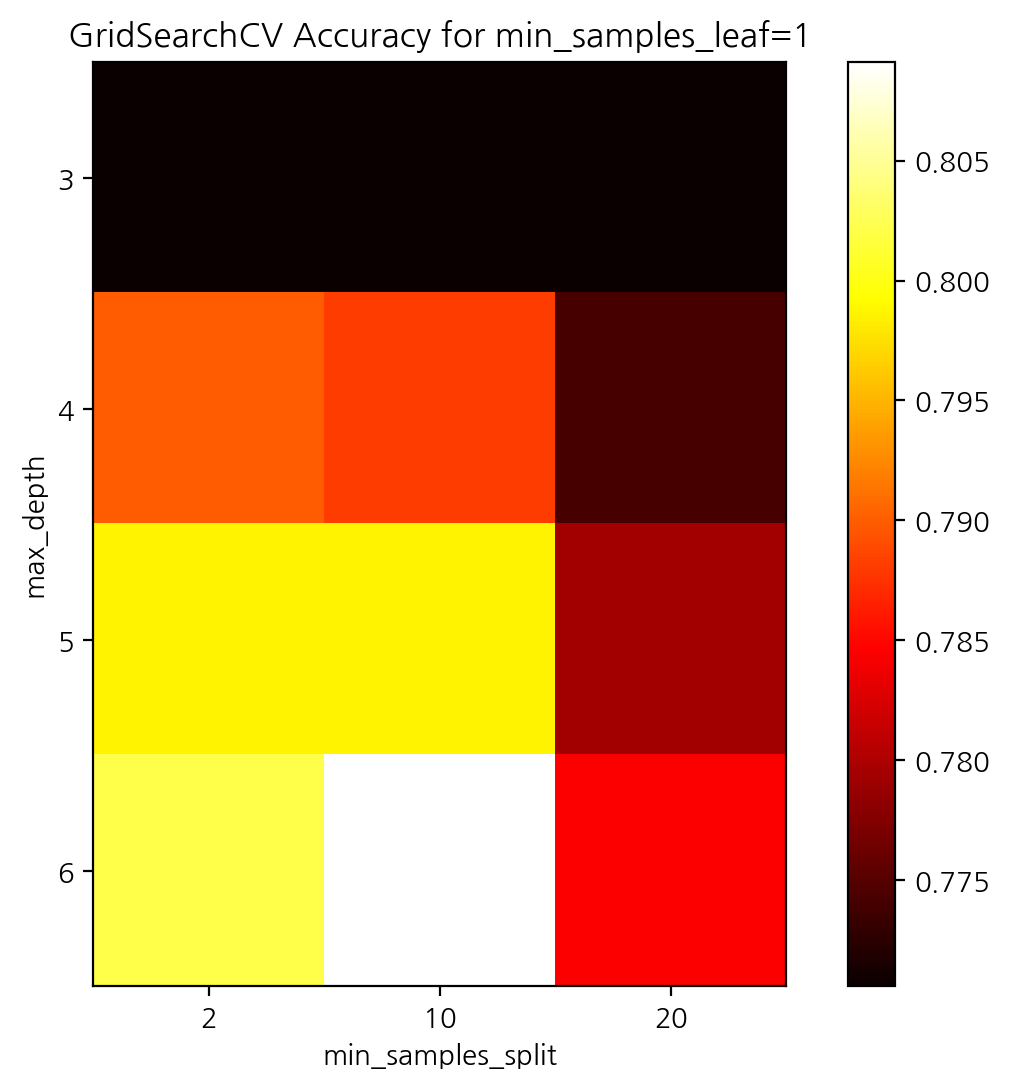

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# 하이퍼파라미터 범위 설정
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# GridSearchCV로 최적의 파라미터 탐색
grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")

# 최적의 파라미터로 모델 훈련 및 평가
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_predict_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_predict_best)

# 정확도 시각화
accuracies = grid_search.cv_results_['mean_test_score'][np.where(grid_search.cv_results_['param_min_samples_leaf'] == 1)].reshape(4, 3)

# 정확도 히트맵 시각화
plt.figure(figsize=(8, 6))
plt.imshow(accuracies, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(3), param_grid['min_samples_split'])
plt.yticks(np.arange(4), param_grid['max_depth'])
plt.title('GridSearchCV Accuracy for min_samples_leaf=1')
plt.show()

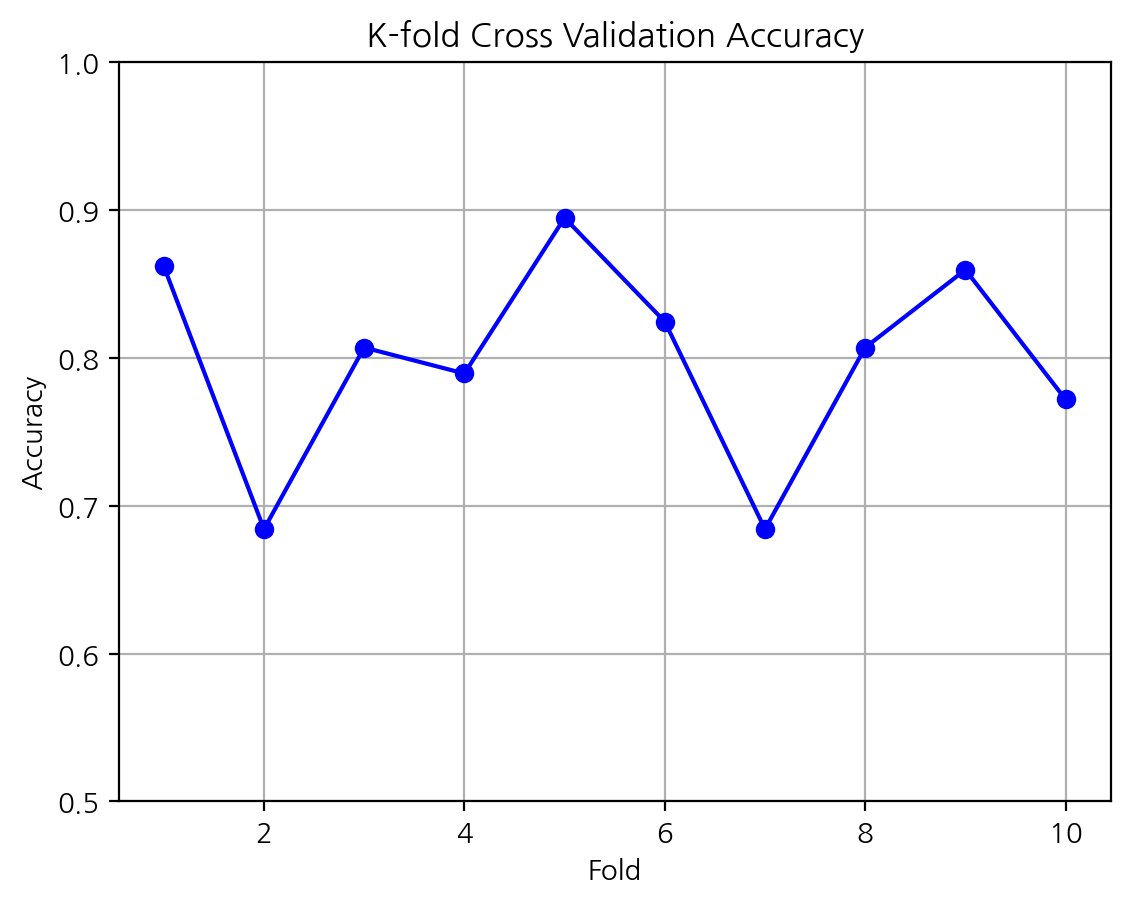

Mean Accuracy: 0.80, Std Dev: 0.07


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# K-fold Cross Validation (K=10)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=10)

# 각 fold에서의 정확도 출력 및 시각화
plt.plot(range(1, 11), cross_val_scores, marker='o', color='blue')
plt.title('K-fold Cross Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.grid(True)
plt.show()

print(f"Mean Accuracy: {cross_val_scores.mean():.2f}, Std Dev: {cross_val_scores.std():.2f}")

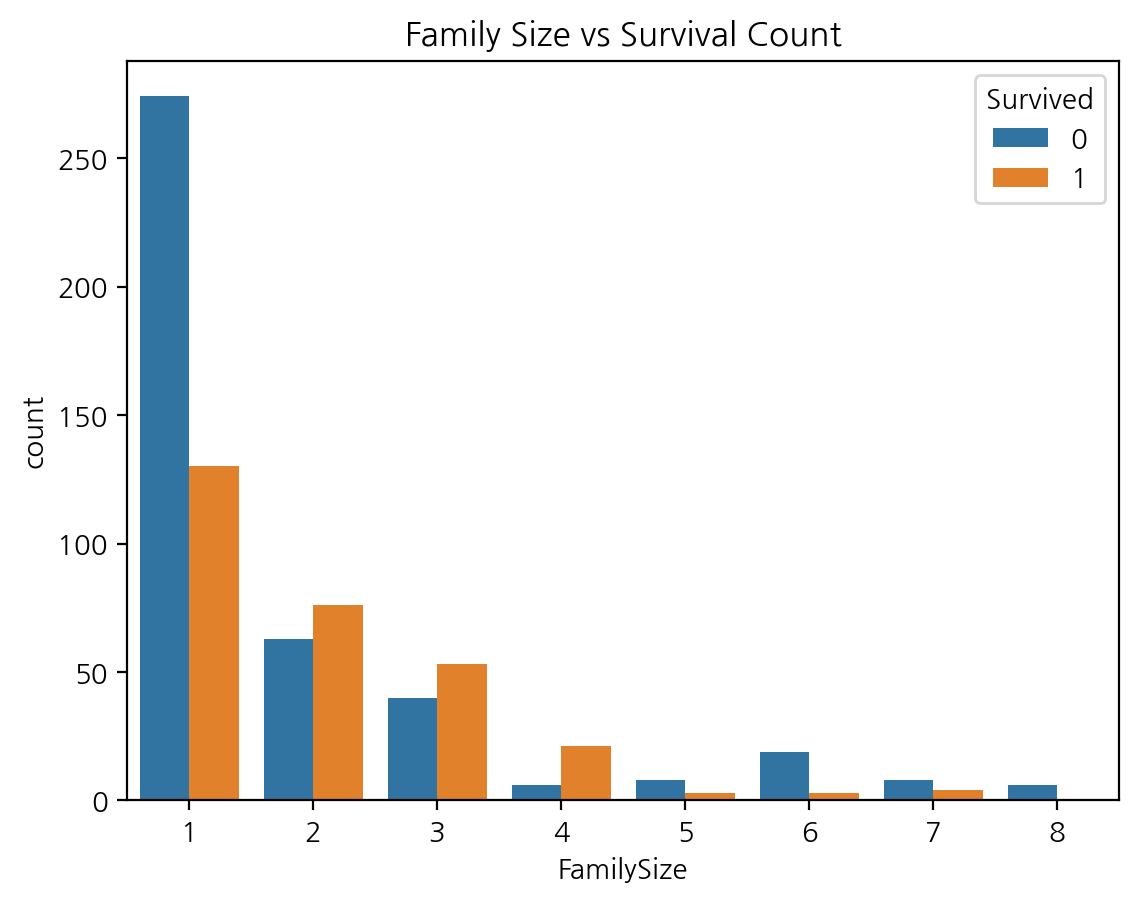

In [ ]:
# 새로운 Feature 'FamilySize' 생성
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# FamilySize 분포 시각화
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Family Size vs Survival Count')
plt.show()

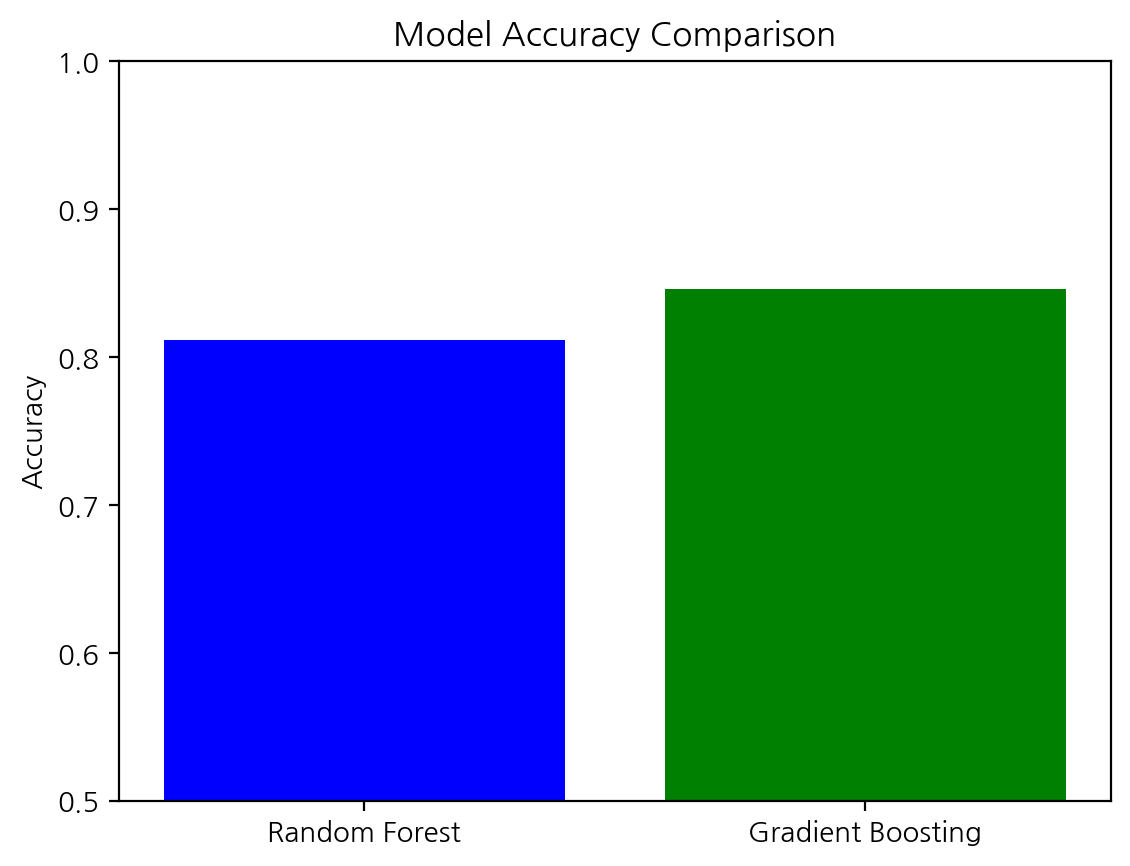

Random Forest Accuracy: 0.81
Gradient Boosting Accuracy: 0.85


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest 모델 학습 및 평가
rf_model = RandomForestClassifier(random_state=1, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_predict = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_predict)

# Gradient Boosting 모델 학습 및 평가
gb_model = GradientBoostingClassifier(random_state=1)
gb_model.fit(X_train, y_train)
gb_y_predict = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_predict)

# 성능 비교 시각화
models = ['Random Forest', 'Gradient Boosting']
accuracies = [rf_accuracy, gb_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

In [ ]:
!pip install shap

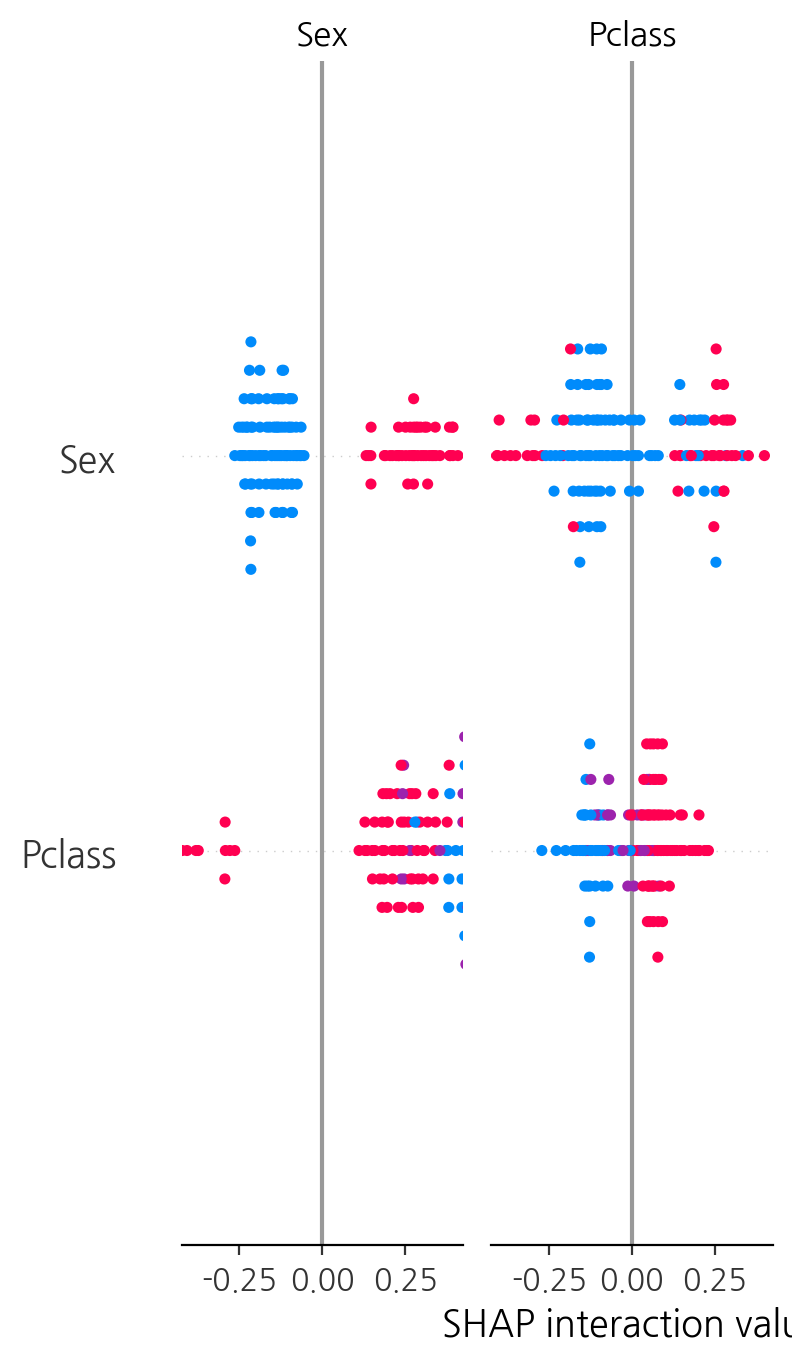

In [ ]:
import shap

# SHAP 분석을 위한 모델 학습 (예: Random Forest)
explainer = shap.TreeExplainer(rf_model)

# SHAP 값 계산
shap_values = explainer.shap_values(X_test)

# SHAP 값이 다중 클래스 문제인지 확인하여 이진 분류의 경우 적절한 값을 선택
# 이진 분류인 경우 shap_values[1]을 사용하여 생존 클래스(1)에 대한 분석 수행
if isinstance(shap_values, list):  # shap_values가 클래스별로 나뉘는지 확인
    shap_value_to_use = shap_values[1]  # 생존 클래스에 대한 SHAP 값 선택
else:
    shap_value_to_use = shap_values  # shap_values가 리스트가 아닌 경우 그대로 사용

# SHAP 시각화 (양성 클래스에 대한 SHAP 값 시각화)
shap.summary_plot(shap_value_to_use, X_test, plot_type="bar")


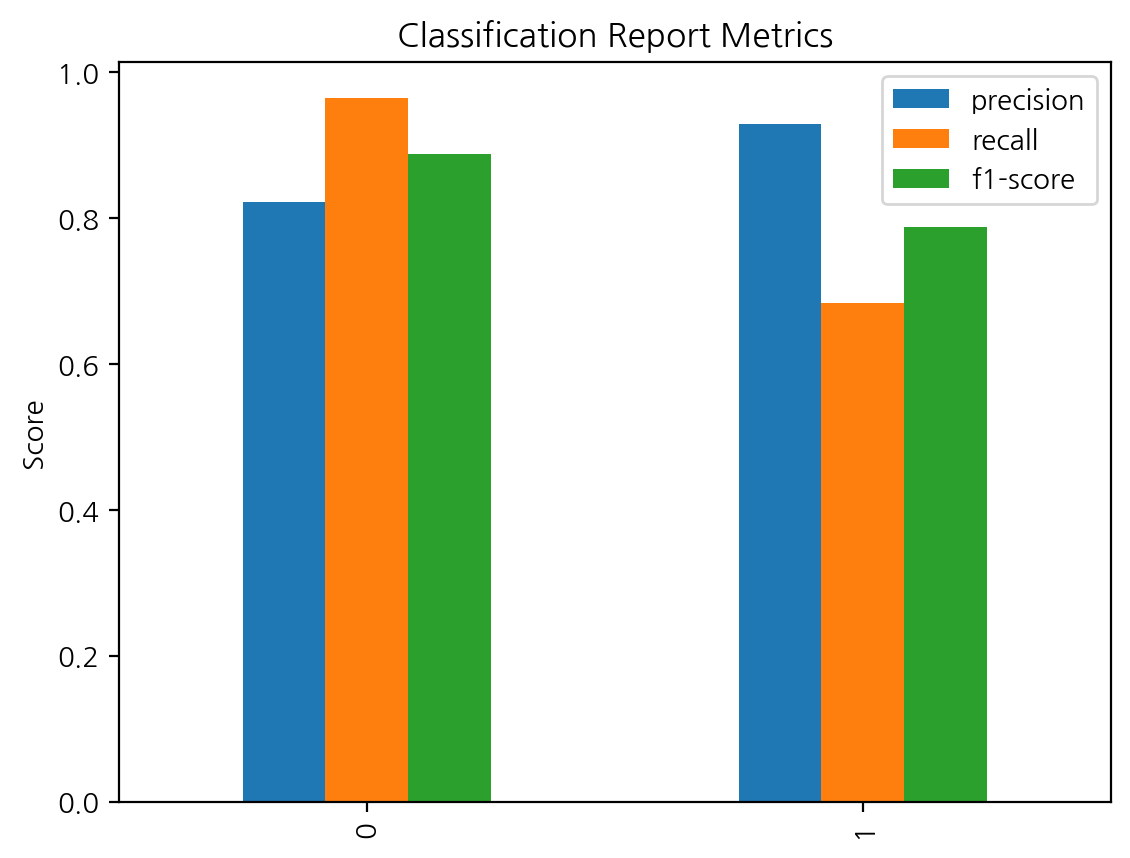

In [ ]:
from sklearn.metrics import classification_report

# Classification Report 출력
report = classification_report(y_test, y_predict_best, output_dict=True)

# Precision, Recall, F1-Score 시각화
df_report = pd.DataFrame(report).transpose()
df_report[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar')
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.show()

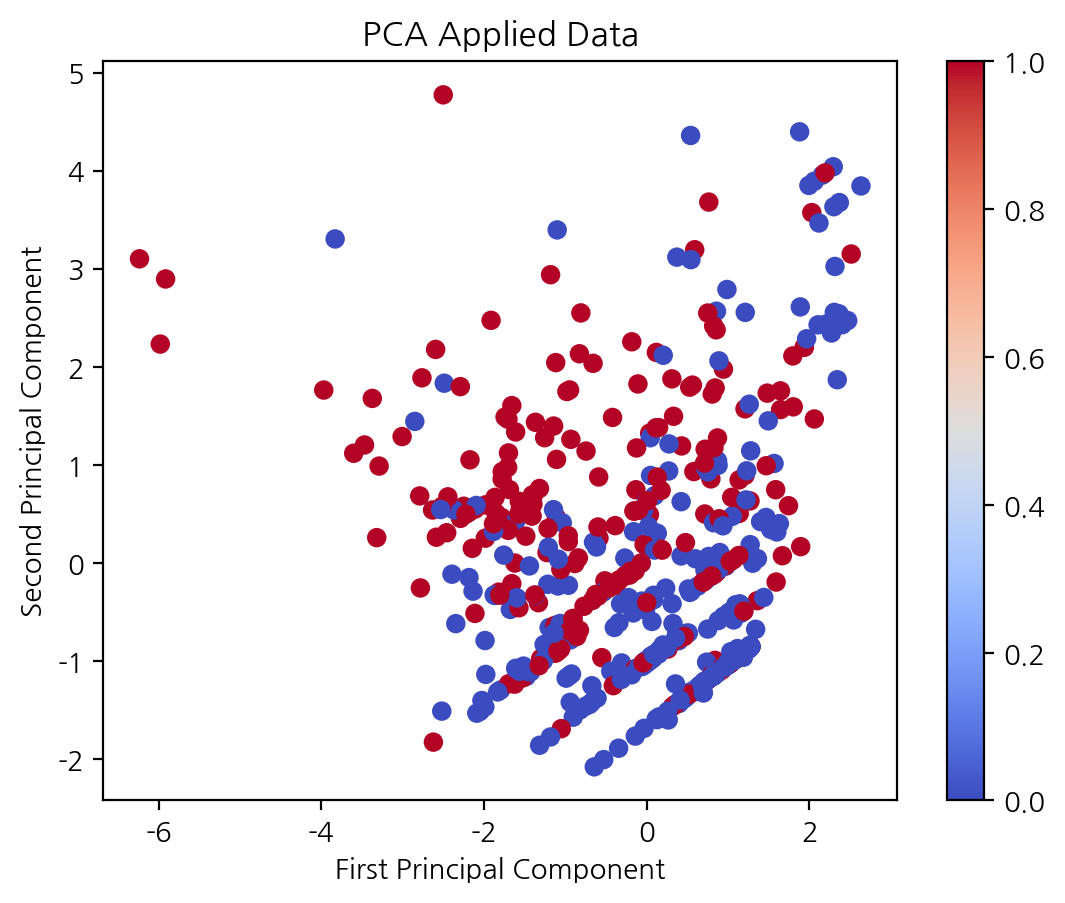

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 적용
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PCA 시각화
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.title('PCA Applied Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

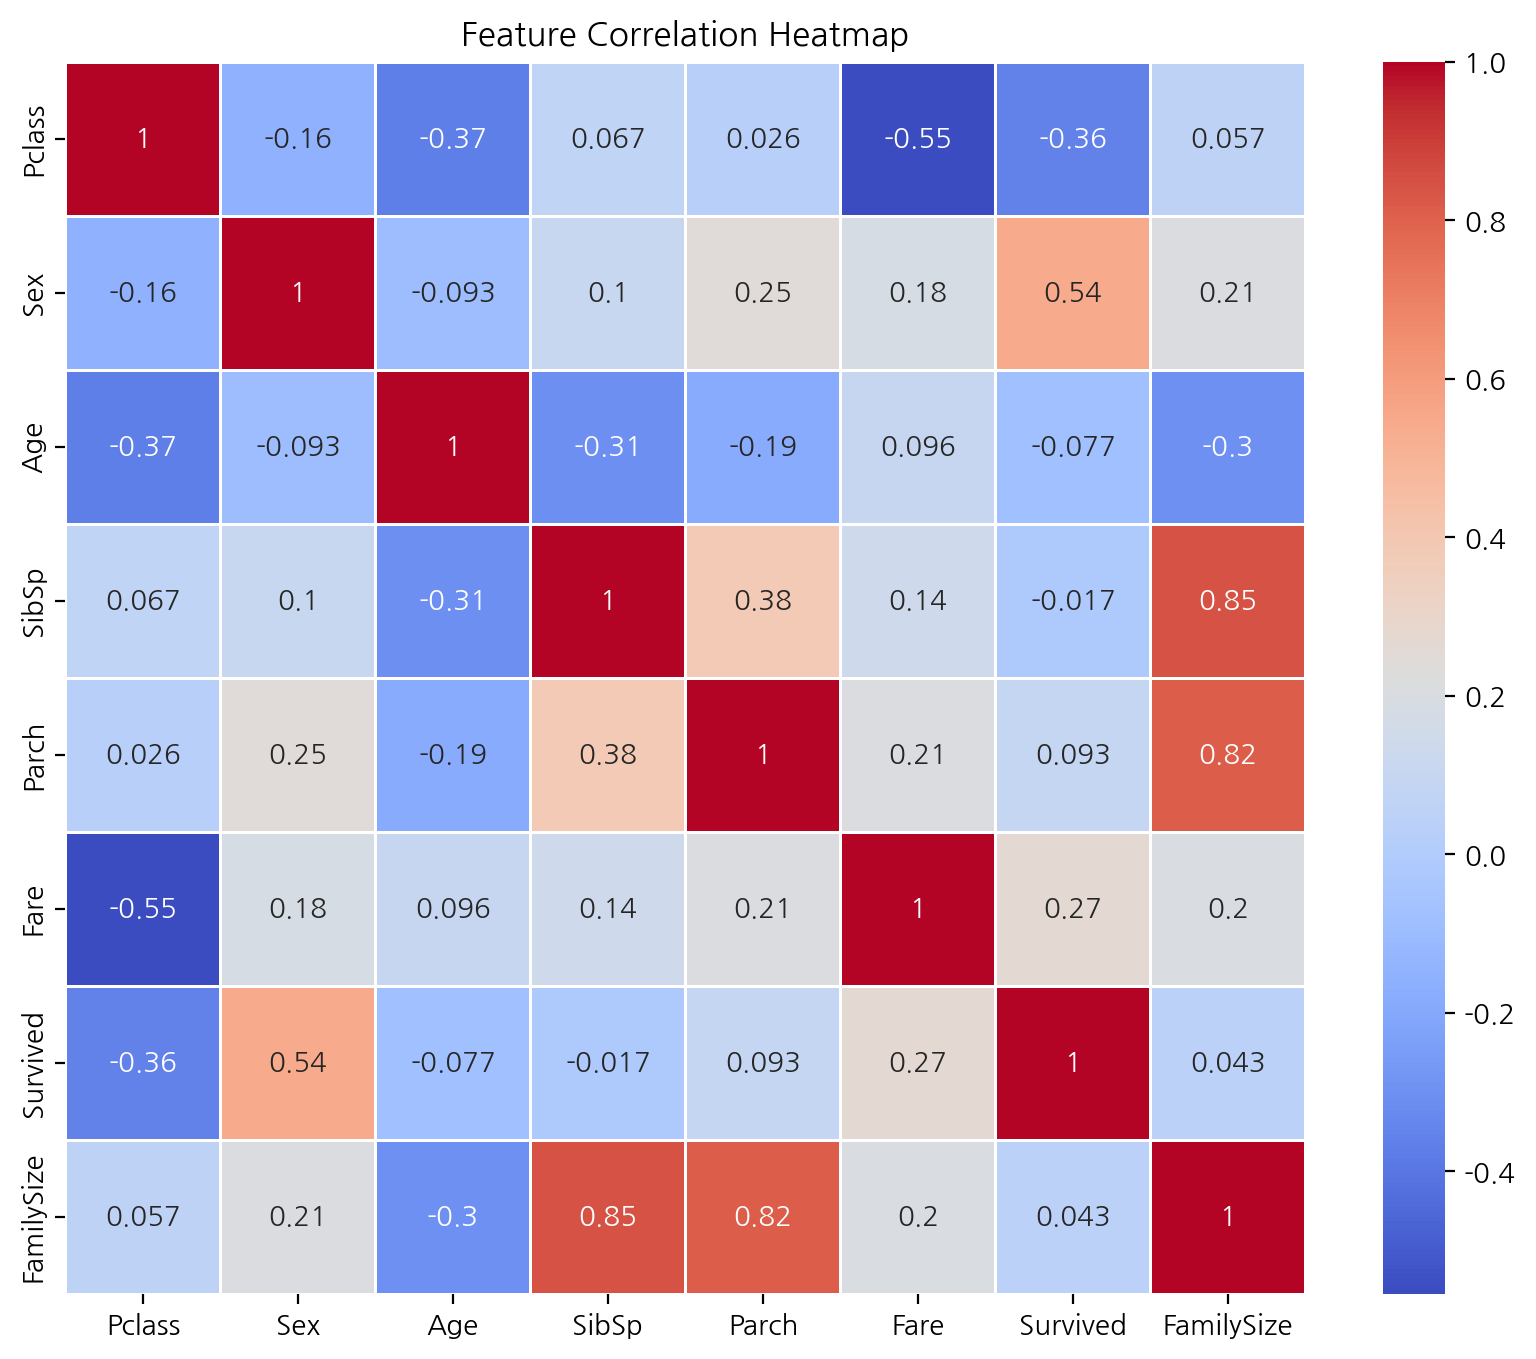

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()